# Student Depression Dataset - Preprocessing & Feature Engineering

Notebook này thực hiện các bước tiền xử lý dữ liệu và tạo features mới cho việc dự đoán trầm cảm ở sinh viên.

**Mục tiêu:**
1. Load và làm sạch dữ liệu
2. Handle missing values và invalid values
3. Encode categorical variables
4. Feature engineering (tạo features mới)
5. Export processed data

## 1. Setup & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

# Add src to path
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), "src"))
sys.path.insert(0, "../src")

warnings.filterwarnings("ignore")

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Plot settings
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 11

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Raw Data

In [2]:
# Load the dataset
DATA_PATH = "../data/student_depression_dataset.csv"
df_raw = pd.read_csv(DATA_PATH)

print(f"Dataset shape: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")
print(f"\nColumns:")
for i, col in enumerate(df_raw.columns, 1):
    print(f"   {i:2}. {col}")

Dataset shape: 27901 rows × 18 columns

Columns:
    1. id
    2. Gender
    3. Age
    4. City
    5. Profession
    6. Academic Pressure
    7. Work Pressure
    8. CGPA
    9. Study Satisfaction
   10. Job Satisfaction
   11. Sleep Duration
   12. Dietary Habits
   13. Degree
   14. Have you ever had suicidal thoughts ?
   15. Work/Study Hours
   16. Financial Stress
   17. Family History of Mental Illness
   18. Depression


In [3]:
# Preview data
df_raw.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In [4]:
# Data types and info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## 3. Data Cleaning

### 3.1 Filter Students Only

In [5]:
# Check profession distribution
print("Profession Distribution:")
print(df_raw["Profession"].value_counts())
print(f"\nStudent percentage: {(df_raw['Profession'] == 'Student').mean() * 100:.2f}%")

Profession Distribution:
Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
Chef                            2
'Content Writer'                2
Pharmacist                      2
Doctor                          2
'UX/UI Designer'                1
'Civil Engineer'                1
Manager                         1
'Educational Consultant'        1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

Student percentage: 99.89%


In [6]:
# Filter to students only (99.9% of data)
df = df_raw[df_raw["Profession"] == "Student"].copy()
print(f"Filtered to students: {len(df)} rows")

Filtered to students: 27870 rows


### 3.2 Drop Irrelevant Columns

In [7]:
# Columns to drop
drop_cols = ["id", "Work Pressure", "Job Satisfaction", "Profession", "City"]

# Check these columns before dropping
print("Columns to drop:")
for col in drop_cols:
    if col in df.columns:
        unique_count = df[col].nunique()
        print(f"   • {col}: {unique_count} unique values")

Columns to drop:
   • id: 27870 unique values
   • Work Pressure: 3 unique values
   • Job Satisfaction: 5 unique values
   • Profession: 1 unique values
   • City: 52 unique values


In [8]:
# Drop columns
df = df.drop(columns=drop_cols, errors="ignore")
print(f"Dropped {len(drop_cols)} columns. New shape: {df.shape}")

Dropped 5 columns. New shape: (27870, 13)


### 3.3 Handle Invalid Values

In [9]:
# Check for invalid values in numeric columns
numeric_cols = [
    "Age",
    "Academic Pressure",
    "CGPA",
    "Study Satisfaction",
    "Work/Study Hours",
    "Financial Stress",
    "Depression",
]

print("Checking for invalid values in numeric columns:")
for col in numeric_cols:
    if col in df.columns:
        # Check for non-numeric values
        non_numeric = df[col].apply(
            lambda x: not isinstance(x, (int, float)) and pd.notna(x)
        )
        if non_numeric.any():
            invalid_vals = df.loc[non_numeric, col].unique()
            print(f"   {col}: {non_numeric.sum()} invalid values: {invalid_vals}")

Checking for invalid values in numeric columns:
   Financial Stress: 27870 invalid values: ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


In [10]:
# Clean invalid values - convert to numeric (coerce errors to NaN)
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

print("Invalid numeric values converted to NaN")

Invalid numeric values converted to NaN


In [11]:
# Check for invalid categorical values
print("\nSleep Duration unique values:")
print(df["Sleep Duration"].value_counts())


Sleep Duration unique values:
Sleep Duration
'Less than 5 hours'    8303
'7-8 hours'            7337
'5-6 hours'            6177
'More than 8 hours'    6035
Others                   18
Name: count, dtype: int64


In [12]:
# Handle 'Others' in Sleep Duration
others_count = (df["Sleep Duration"] == "Others").sum()
if others_count > 0:
    df.loc[df["Sleep Duration"] == "Others", "Sleep Duration"] = np.nan
    print(f"Converted {others_count} 'Others' values to NaN in Sleep Duration")

Converted 18 'Others' values to NaN in Sleep Duration


In [13]:
# Check Dietary Habits
print("\nDietary Habits unique values:")
print(df["Dietary Habits"].value_counts())


Dietary Habits unique values:
Dietary Habits
Unhealthy    10309
Moderate      9910
Healthy       7639
Others          12
Name: count, dtype: int64


### 3.4 Handle Missing Values

In [14]:
# Analyze missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame(
    {"Missing Count": missing, "Missing %": missing_pct}
).sort_values("Missing %", ascending=False)

missing_df[missing_df["Missing Count"] > 0]

,Missing Count,Missing %
Sleep Duration,18,0.06
Financial Stress,3,0.01


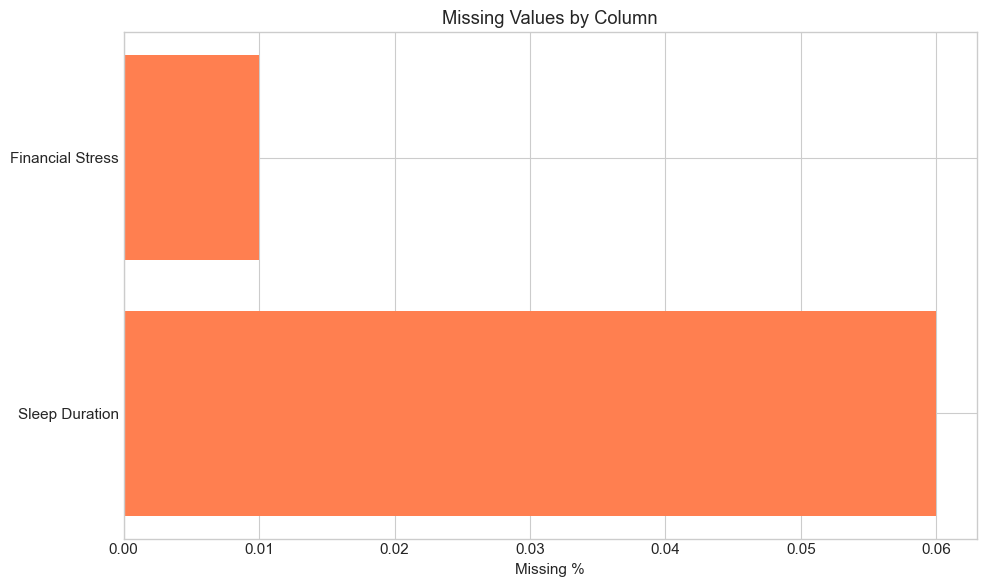

In [15]:
# Visualize missing values
if missing_df["Missing Count"].sum() > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_data = missing_df[missing_df["Missing Count"] > 0]
    ax.barh(missing_data.index, missing_data["Missing %"], color="coral")
    ax.set_xlabel("Missing %")
    ax.set_title("Missing Values by Column")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize!")

In [16]:
# Fill missing values
# Numerical: median
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"   Filled {col} with median: {median_val}")

# Categorical: mode
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"   Filled {col} with mode: {mode_val}")

print(f"\nMissing values handled. Total NaN remaining: {df.isnull().sum().sum()}")

   Filled Financial Stress with median: 3.0
   Filled Sleep Duration with mode: 'Less than 5 hours'

Missing values handled. Total NaN remaining: 0


## 4. Encoding Categorical Variables

### 4.1 Ordinal Encoding

In [17]:
# Sleep Duration - Ordinal encoding
sleep_order = {
    "'Less than 5 hours'": 0,
    "Less than 5 hours": 0,
    "'5-6 hours'": 1,
    "5-6 hours": 1,
    "'7-8 hours'": 2,
    "7-8 hours": 2,
    "'More than 8 hours'": 3,
    "More than 8 hours": 3,
}

df["Sleep_Encoded"] = df["Sleep Duration"].map(sleep_order)
print("Encoded Sleep Duration:")
print("   0 = Less than 5 hours (worst)")
print("   1 = 5-6 hours")
print("   2 = 7-8 hours")
print("   3 = More than 8 hours (best)")
print(f"\n   Distribution: {df['Sleep_Encoded'].value_counts().sort_index().to_dict()}")

Encoded Sleep Duration:
   0 = Less than 5 hours (worst)
   1 = 5-6 hours
   2 = 7-8 hours
   3 = More than 8 hours (best)

   Distribution: {0: 8321, 1: 6177, 2: 7337, 3: 6035}


In [18]:
# Dietary Habits - Ordinal encoding
diet_order = {"Unhealthy": 0, "Moderate": 1, "Healthy": 2}

df["Diet_Encoded"] = df["Dietary Habits"].map(diet_order)
print("Encoded Dietary Habits:")
print("   0 = Unhealthy")
print("   1 = Moderate")
print("   2 = Healthy")
print(f"\n   Distribution: {df['Diet_Encoded'].value_counts().sort_index().to_dict()}")

Encoded Dietary Habits:
   0 = Unhealthy
   1 = Moderate
   2 = Healthy

   Distribution: {0.0: 10309, 1.0: 9910, 2.0: 7639}


### 4.2 Binary Encoding

In [19]:
# Gender
df["Gender_Encoded"] = (df["Gender"] == "Female").astype(int)
print(f"Encoded Gender: 0=Male, 1=Female")
print(f"   Distribution: {df['Gender_Encoded'].value_counts().to_dict()}")

Encoded Gender: 0=Male, 1=Female
   Distribution: {0: 15529, 1: 12341}


In [20]:
# Family History of Mental Illness
df["Family_History_Encoded"] = (df["Family History of Mental Illness"] == "Yes").astype(
    int
)
print(f"Encoded Family History: 0=No, 1=Yes")
print(f"   Distribution: {df['Family_History_Encoded'].value_counts().to_dict()}")

Encoded Family History: 0=No, 1=Yes
   Distribution: {0: 14384, 1: 13486}


In [21]:
# Suicidal Thoughts
suicidal_col = "Have you ever had suicidal thoughts ?"
df["Suicidal_Thoughts_Encoded"] = (df[suicidal_col] == "Yes").astype(int)
print(f"Encoded Suicidal Thoughts: 0=No, 1=Yes")
print(f"   Distribution: {df['Suicidal_Thoughts_Encoded'].value_counts().to_dict()}")

Encoded Suicidal Thoughts: 0=No, 1=Yes
   Distribution: {1: 17631, 0: 10239}


### 4.3 One-Hot Encoding for Degree

In [22]:
# Check Degree distribution
print("Degree Distribution:")
print(df["Degree"].value_counts())

Degree Distribution:
Degree
'Class 12'    6080
B.Ed          1864
B.Com         1506
B.Arch        1477
BCA           1432
MSc           1186
B.Tech        1152
MCA           1042
M.Tech        1022
BHM            922
BSc            885
M.Ed           821
B.Pharm        809
M.Com          733
BBA            695
MBBS           695
LLB            671
BE             612
BA             599
M.Pharm        581
MD             569
MBA            562
MA             542
PhD            521
LLM            481
MHM            191
ME             185
Others          35
Name: count, dtype: int64


In [23]:
# One-hot encode Degree
degree_dummies = pd.get_dummies(df["Degree"], prefix="Degree")
df = pd.concat([df, degree_dummies], axis=1)
print(f"One-hot encoded Degree: {len(degree_dummies.columns)} categories created")

One-hot encoded Degree: 28 categories created


## 5. Feature Engineering

### 5.1 Composite Features

In [24]:
# Lifestyle Score (Sleep + Diet combined)
df["Lifestyle_Score"] = df["Sleep_Encoded"] + df["Diet_Encoded"]
print(
    f"Created Lifestyle_Score (range: {df['Lifestyle_Score'].min()}-{df['Lifestyle_Score'].max()})"
)
print("   Higher = healthier lifestyle")

Created Lifestyle_Score (range: 0.0-5.0)
   Higher = healthier lifestyle


In [25]:
# Total Stress Score
df["Total_Stress"] = df["Academic Pressure"] + df["Financial Stress"]
print(
    f"Created Total_Stress (range: {df['Total_Stress'].min()}-{df['Total_Stress'].max()})"
)
print("   Higher = more stress")

Created Total_Stress (range: 1.0-10.0)
   Higher = more stress


In [26]:
# Study Efficiency
df["Study_Efficiency"] = df["CGPA"] / (df["Work/Study Hours"] + 1)
print(
    f"Created Study_Efficiency (range: {df['Study_Efficiency'].min():.2f}-{df['Study_Efficiency'].max():.2f})"
)
print("   Higher = more efficient (high GPA with less hours)")

Created Study_Efficiency (range: 0.00-10.00)
   Higher = more efficient (high GPA with less hours)


In [27]:
# Is Class 12 flag (high-risk group)
df["Is_Class12"] = (df["Degree"] == "Class 12").astype(int)
print(f"Created Is_Class12 flag")
print(
    f"   Class 12 students: {df['Is_Class12'].sum()} ({df['Is_Class12'].mean()*100:.1f}%)"
)

Created Is_Class12 flag
   Class 12 students: 0 (0.0%)


### 5.2 Interaction Features

In [28]:
# Academic Pressure × Lifestyle
df["AcademicPressure_x_Lifestyle"] = df["Academic Pressure"] * df["Lifestyle_Score"]
print("Created AcademicPressure_x_Lifestyle")

# Financial Stress × Family History
df["FinancialStress_x_FamilyHistory"] = (
    df["Financial Stress"] * df["Family_History_Encoded"]
)
print("Created FinancialStress_x_FamilyHistory")

# Total Stress × Lifestyle
df["TotalStress_x_Lifestyle"] = df["Total_Stress"] * df["Lifestyle_Score"]
print("Created TotalStress_x_Lifestyle")

Created AcademicPressure_x_Lifestyle
Created FinancialStress_x_FamilyHistory
Created TotalStress_x_Lifestyle


### 5.3 Age & CGPA Categories

In [29]:
# Age Groups
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 20, 25, 30, 100],
    labels=["Teen", "Young_Adult", "Adult", "Mature"],
)
age_group_order = {"Teen": 0, "Young_Adult": 1, "Adult": 2, "Mature": 3}
df["Age_Group_Encoded"] = df["Age_Group"].map(age_group_order)
print(f"Created Age_Group: {df['Age_Group'].value_counts().to_dict()}")

Created Age_Group: {'Young_Adult': 8559, 'Adult': 7836, 'Mature': 6091, 'Teen': 5384}


In [30]:
# CGPA Categories
df["CGPA_Category"] = pd.cut(
    df["CGPA"], bins=[0, 6, 7.5, 9, 10], labels=["Low", "Medium", "High", "Excellent"]
)
cgpa_order = {"Low": 0, "Medium": 1, "High": 2, "Excellent": 3}
df["CGPA_Category_Encoded"] = df["CGPA_Category"].map(cgpa_order)
print(f"Created CGPA_Category: {df['CGPA_Category'].value_counts().to_dict()}")

Created CGPA_Category: {'High': 8893, 'Medium': 7191, 'Excellent': 6225, 'Low': 5552}


### 5.4 Stress Level Categories

In [31]:
def categorize_stress(value):
    if pd.isna(value):
        return np.nan
    elif value <= 2:
        return "Low"
    elif value == 3:
        return "Medium"
    else:
        return "High"


stress_order = {"Low": 0, "Medium": 1, "High": 2}

# Academic Pressure Level
df["Academic_Pressure_Level"] = df["Academic Pressure"].apply(categorize_stress)
df["Academic_Pressure_Level_Encoded"] = df["Academic_Pressure_Level"].map(stress_order)

# Financial Stress Level
df["Financial_Stress_Level"] = df["Financial Stress"].apply(categorize_stress)
df["Financial_Stress_Level_Encoded"] = df["Financial_Stress_Level"].map(stress_order)

print("Created stress level categories (Low/Medium/High)")

Created stress level categories (Low/Medium/High)


### 5.5 Risk Score

In [32]:
# Create composite Risk Score
risk_score = pd.Series(0, index=df.index, dtype=float)

# Sleep risk (inverted: less sleep = higher risk)
max_sleep = df["Sleep_Encoded"].max()
risk_score += (max_sleep - df["Sleep_Encoded"]) / max_sleep * 2  # Weight: 2

# Diet risk (inverted: unhealthy = higher risk)
max_diet = df["Diet_Encoded"].max()
risk_score += (max_diet - df["Diet_Encoded"]) / max_diet * 2  # Weight: 2

# Financial Stress (highest impact from EDA)
max_fin = df["Financial Stress"].max()
risk_score += df["Financial Stress"] / max_fin * 3  # Weight: 3

# Academic Pressure
max_acad = df["Academic Pressure"].max()
risk_score += df["Academic Pressure"] / max_acad * 1.5  # Weight: 1.5

# Family History
risk_score += df["Family_History_Encoded"] * 1.5  # Weight: 1.5

# Suicidal Thoughts
risk_score += df["Suicidal_Thoughts_Encoded"] * 2  # Weight: 2

# Class 12 flag
risk_score += df["Is_Class12"] * 1  # Weight: 1

df["Risk_Score"] = risk_score
print(f"Created Risk_Score (range: {risk_score.min():.2f}-{risk_score.max():.2f})")

Created Risk_Score (range: 0.90-12.00)


## 6. Visualize Engineered Features

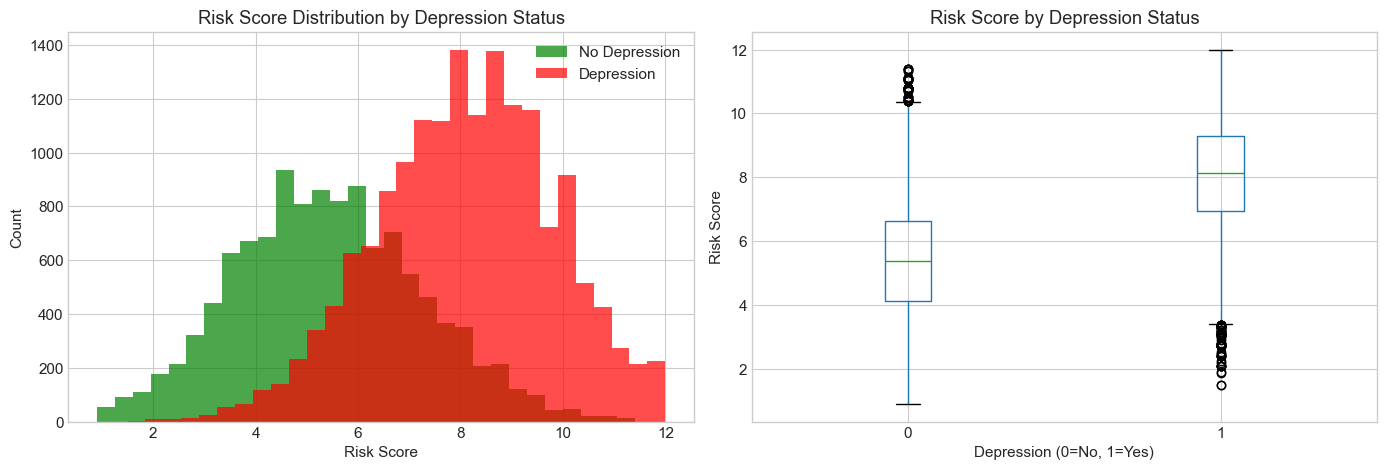

In [33]:
# Risk Score distribution by Depression status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
ax1 = axes[0]
df[df["Depression"] == 0]["Risk_Score"].hist(
    bins=30, alpha=0.7, label="No Depression", ax=ax1, color="green"
)
df[df["Depression"] == 1]["Risk_Score"].hist(
    bins=30, alpha=0.7, label="Depression", ax=ax1, color="red"
)
ax1.set_xlabel("Risk Score")
ax1.set_ylabel("Count")
ax1.set_title("Risk Score Distribution by Depression Status")
ax1.legend()

# Box plot
ax2 = axes[1]
df.boxplot(column="Risk_Score", by="Depression", ax=ax2)
ax2.set_xlabel("Depression (0=No, 1=Yes)")
ax2.set_ylabel("Risk Score")
ax2.set_title("Risk Score by Depression Status")
plt.suptitle("")

plt.tight_layout()
plt.show()

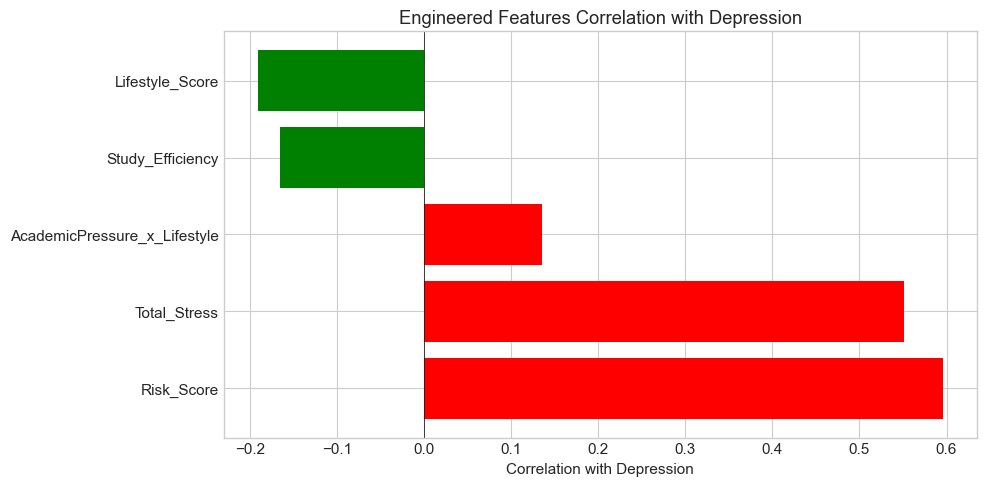


Feature Correlations with Depression:
                              Correlation
Risk_Score                       0.595657
Total_Stress                     0.550923
AcademicPressure_x_Lifestyle     0.135200
Study_Efficiency                -0.165084
Lifestyle_Score                 -0.190889
Is_Class12                            NaN


In [34]:
# Correlation of new features with Depression
new_features = [
    "Lifestyle_Score",
    "Total_Stress",
    "Study_Efficiency",
    "Is_Class12",
    "Risk_Score",
    "AcademicPressure_x_Lifestyle",
]

correlations = {}
for feat in new_features:
    if feat in df.columns:
        corr = df[feat].corr(df["Depression"])
        correlations[feat] = corr

corr_df = pd.DataFrame.from_dict(correlations, orient="index", columns=["Correlation"])
corr_df = corr_df.sort_values("Correlation", ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
colors = ["red" if x > 0 else "green" for x in corr_df["Correlation"]]
ax.barh(corr_df.index, corr_df["Correlation"], color=colors)
ax.set_xlabel("Correlation with Depression")
ax.set_title("Engineered Features Correlation with Depression")
ax.axvline(x=0, color="black", linestyle="-", linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nFeature Correlations with Depression:")
print(corr_df)

## 7. Prepare Final Dataset

In [35]:
# Drop original categorical columns (keep only encoded versions)
cols_to_drop = [
    "Sleep Duration",
    "Dietary Habits",
    "Gender",
    "Family History of Mental Illness",
    "Have you ever had suicidal thoughts ?",
    "Degree",
    "Age_Group",
    "CGPA_Category",
    "Academic_Pressure_Level",
    "Financial_Stress_Level",
]

df_final = df.drop(
    columns=[c for c in cols_to_drop if c in df.columns], errors="ignore"
)
print(f"Final dataset shape: {df_final.shape}")

Final dataset shape: (27870, 52)


In [36]:
# Display final columns
print("\nFinal Features:")
for i, col in enumerate(df_final.columns, 1):
    print(f"   {i:2}. {col}")


Final Features:
    1. Age
    2. Academic Pressure
    3. CGPA
    4. Study Satisfaction
    5. Work/Study Hours
    6. Financial Stress
    7. Depression
    8. Sleep_Encoded
    9. Diet_Encoded
   10. Gender_Encoded
   11. Family_History_Encoded
   12. Suicidal_Thoughts_Encoded
   13. Degree_'Class 12'
   14. Degree_B.Arch
   15. Degree_B.Com
   16. Degree_B.Ed
   17. Degree_B.Pharm
   18. Degree_B.Tech
   19. Degree_BA
   20. Degree_BBA
   21. Degree_BCA
   22. Degree_BE
   23. Degree_BHM
   24. Degree_BSc
   25. Degree_LLB
   26. Degree_LLM
   27. Degree_M.Com
   28. Degree_M.Ed
   29. Degree_M.Pharm
   30. Degree_M.Tech
   31. Degree_MA
   32. Degree_MBA
   33. Degree_MBBS
   34. Degree_MCA
   35. Degree_MD
   36. Degree_ME
   37. Degree_MHM
   38. Degree_MSc
   39. Degree_Others
   40. Degree_PhD
   41. Lifestyle_Score
   42. Total_Stress
   43. Study_Efficiency
   44. Is_Class12
   45. AcademicPressure_x_Lifestyle
   46. FinancialStress_x_FamilyHistory
   47. TotalStress_x_Lif

In [37]:
# Summary statistics
df_final.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Sleep_Encoded,Diet_Encoded,Gender_Encoded,Family_History_Encoded,Suicidal_Thoughts_Encoded,Lifestyle_Score,Total_Stress,Study_Efficiency,Is_Class12,AcademicPressure_x_Lifestyle,FinancialStress_x_FamilyHistory,TotalStress_x_Lifestyle,Academic_Pressure_Level_Encoded,Financial_Stress_Level_Encoded,Risk_Score
count,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27858.000000,27870.000000,27870.000000,27870.000000,27858.000000,27870.000000,27870.000000,27870.0,27858.000000,27870.000000,27858.000000,27870.000000,27870.000000,27858.000000
mean,25.821134,3.140617,7.656028,2.943559,7.157948,3.139505,0.585145,1.397775,0.904157,0.442806,0.483889,0.632616,2.302104,6.280122,1.544845,0.0,7.063895,1.525296,14.183466,1.087944,1.082526,6.980811
std,4.906574,1.381640,1.470835,1.361209,3.707180,1.437212,0.492706,1.126857,0.796934,0.496727,0.499749,0.482101,1.379097,2.139474,1.779895,0.0,5.501762,1.868182,9.999579,0.851478,0.897691,2.196020
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.671111,0.0,3.000000,0.000000,7.000000,0.000000,0.000000,5.400000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,6.000000,0.878542,0.0,6.000000,0.000000,12.000000,1.000000,1.000000,7.066667
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,8.000000,1.462500,0.0,10.000000,3.000000,20.000000,2.000000,2.000000,8.600000
max,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,0.0,25.000000,5.000000,50.000000,2.000000,2.000000,12.000000


## 8. Save Processed Data

In [38]:
# Save to CSV
output_path = "../results/processed_data_notebook.csv"
os.makedirs("../results", exist_ok=True)
df_final.to_csv(output_path, index=False)
print(f"Saved processed data to: {output_path}")

Saved processed data to: ../results/processed_data_notebook.csv


In [39]:
# Also save as pickle for faster loading
df_final.to_pickle("../results/processed_data.pkl")
print("Saved pickle file for faster loading")

Saved pickle file for faster loading


## 9. Summary

### Preprocessing Steps Completed:
1. Loaded 27,901 rows × 18 columns
2. Filtered to students only (27,870 rows)
3. Dropped irrelevant columns (id, Work Pressure, Job Satisfaction, etc.)
4. Cleaned invalid values ('?', 'Others')
5. Handled missing values (median/mode imputation)
6. Encoded categorical variables:
   - Ordinal: Sleep Duration, Dietary Habits
   - Binary: Gender, Family History, Suicidal Thoughts
   - One-Hot: Degree

### Features Engineered:
- `Lifestyle_Score`: Sleep + Diet (higher = healthier)
- `Total_Stress`: Academic + Financial stress
- `Study_Efficiency`: CGPA / Work Hours
- `Is_Class12`: High-risk group flag
- `Risk_Score`: Composite risk indicator
- Interaction features: AcademicPressure_x_Lifestyle, etc.
- Categorical bins: Age_Group, CGPA_Category, Stress_Level

In [40]:
print("Preprocessing complete! Ready for modeling.")
print(f"\nFinal dataset:")
print(f"   Rows: {len(df_final)}")
print(f"   Features: {len(df_final.columns) - 1}")  # -1 for target
print(
    f"   Target: Depression (0={sum(df_final['Depression']==0)}, 1={sum(df_final['Depression']==1)})"
)

Preprocessing complete! Ready for modeling.

Final dataset:
   Rows: 27870
   Features: 51
   Target: Depression (0=11562, 1=16308)
